<a href="https://colab.research.google.com/github/soiqualang/colab/blob/master/Google_Earth_Engine_t1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://developers.google.com/earth-engine/python_install-colab

https://github.com/soiqualang/earthengine-api

# Cài đặt

Cài đặt và xác thực api

In [0]:
!pip install earthengine-api

In [0]:
!earthengine authenticate

Running command using Cloud API.  Set --no-use_cloud_api to go back to using the API

/usr/local/lib/python3.6/dist-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/qwF3oA_n-x-VQFjAdEnAp8gAg77dWXDCKgX7iPNKxdr

# Test API

In [0]:
import ee
ee.Initialize()

In [0]:
# Print the elevation of Mount Everest.
dem = ee.Image('USGS/SRTMGL1_003')
xy = ee.Geometry.Point([86.9250, 27.9881])
elev = dem.sample(xy, 30).first().get('elevation').getInfo()
print('Mount Everest elevation (m):', elev)

Mount Everest elevation (m): 8729


## Map visualization

In [0]:
# Import the Image function from the IPython.display module. 
from IPython.display import Image

# Display a thumbnail of global elevation.
Image(url=dem.getThumbUrl({'min': 0, 'max': 3000}))

In [0]:
# Import the Folium library.
import folium

# Define a method for displaying Earth Engine image tiles to folium map.
def add_ee_layer(self, eeImageObject, visParams, name):
  mapID = ee.Image(eeImageObject).getMapId(visParams)
  folium.raster_layers.TileLayer(
    tiles = "https://earthengine.googleapis.com/map/"+mapID['mapid']+
      "/{z}/{x}/{y}?token="+mapID['token'],
    attr = "Map Data &copy; <a href='https://earthengine.google.com/'>Google Earth Engine</a>",
    name = name,
    overlay = True,
    control = True
  ).add_to(self)

# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

# Set visualization parameters.
visParams = {'min':0, 'max':3000, 'palette':['225ea8','41b6c4','a1dab4','ffffcc']}

# Create a folium map object.
myMap = folium.Map(location=[20, 0], zoom_start=3, height=500)

# Add the elevation model to the map object.
myMap.add_ee_layer(dem, visParams, 'DEM')

# Add a layer control panel to the map.
myMap.add_child(folium.LayerControl())

# Display the map.
display(myMap)

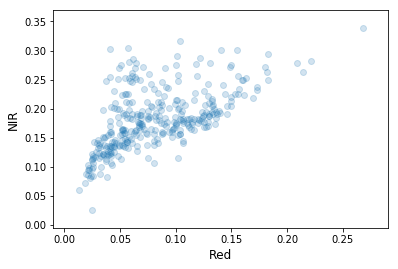

In [0]:
# Import the matplotlib.pyplot module.
import matplotlib.pyplot as plt

# Fetch a Landsat image.
img = ee.Image('LANDSAT/LT05/C01/T1_SR/LT05_034033_20000913')

# Select Red and NIR bands, scale them, and sample 500 points.
sampFC = img.select(['B3','B4']).divide(10000).sample(scale=30, numPixels=500)

# Arrange the sample as a list of lists.
sampDict = sampFC.reduceColumns(ee.Reducer.toList().repeat(2), ['B3', 'B4'])
sampList = ee.List(sampDict.get('list'))

# Save server-side ee.List as a client-side Python list.
sampData = sampList.getInfo()

# Display a scatter plot of Red-NIR sample pairs using matplotlib.
plt.scatter(sampData[0], sampData[1], alpha=0.2)
plt.xlabel('Red', fontsize=12)
plt.ylabel('NIR', fontsize=12)
plt.show()



---



In [0]:
import ee
ee.Initialize()

In [0]:
# Print the elevation of Mount Everest.
dem = ee.Image('USGS/SRTMGL1_003')
xy = ee.Geometry.Point([86.9250, 27.9881])
elev = dem.sample(xy, 30).first().get('elevation').getInfo()
print('Mount Everest elevation (m):', elev)

Mount Everest elevation (m): 8729


https://developers.google.com/earth-engine/image_visualization

In [0]:
img1=ee.Image('LANDSAT/LC08/C01/T1_TOA/LC08_044034_20140318')

In [0]:
vizParams = {
  'bands': ['B5', 'B4', 'B3'],
  'min': 0,
  'max': 0.5,
  'gamma': [0.95, 1.1, 1]
}

In [0]:
# Import the Image function from the IPython.display module. 
from IPython.display import Image

# Display a thumbnail of global elevation.
Image(url=img1.getThumbUrl({'min': 0, 'max': 3000}))

In [0]:
Map.setCenter(-122.1899, 37.5010, 10); // San Francisco Bay
Map.addLayer(image, vizParams, 'false color composite');

SyntaxError: ignored

In [0]:
# Import the Folium library.
import folium

# Define a method for displaying Earth Engine image tiles to folium map.
def add_ee_layer(self, eeImageObject, visParams, name):
  mapID = ee.Image(eeImageObject).getMapId(visParams)
  folium.raster_layers.TileLayer(
    tiles = "https://earthengine.googleapis.com/map/"+mapID['mapid']+
      "/{z}/{x}/{y}?token="+mapID['token'],
    attr = "Map Data &copy; <a href='https://earthengine.google.com/'>Google Earth Engine</a>",
    name = name,
    overlay = True,
    control = True
  ).add_to(self)

# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

# Set visualization parameters.
#vizParams = {'min':0, 'max':3000, 'palette':['225ea8','41b6c4','a1dab4','ffffcc']}

# Create a folium map object.
myMap = folium.Map(location=[20, 0], zoom_start=3, height=500)

# Add the elevation model to the map object.
myMap.add_ee_layer(img1, vizParams, 'DEM')

# Add a layer control panel to the map.
myMap.add_child(folium.LayerControl())

# Display the map.
display(myMap)

In [0]:
print(img1.getInfo())

{'type': 'Image', 'bands': [{'id': 'B1', 'data_type': {'type': 'PixelType', 'precision': 'float'}, 'dimensions': [7661, 7801], 'crs': 'EPSG:32610', 'crs_transform': [30.0, 0.0, 460785.0, 0.0, -30.0, 4264215.0]}, {'id': 'B2', 'data_type': {'type': 'PixelType', 'precision': 'float'}, 'dimensions': [7661, 7801], 'crs': 'EPSG:32610', 'crs_transform': [30.0, 0.0, 460785.0, 0.0, -30.0, 4264215.0]}, {'id': 'B3', 'data_type': {'type': 'PixelType', 'precision': 'float'}, 'dimensions': [7661, 7801], 'crs': 'EPSG:32610', 'crs_transform': [30.0, 0.0, 460785.0, 0.0, -30.0, 4264215.0]}, {'id': 'B4', 'data_type': {'type': 'PixelType', 'precision': 'float'}, 'dimensions': [7661, 7801], 'crs': 'EPSG:32610', 'crs_transform': [30.0, 0.0, 460785.0, 0.0, -30.0, 4264215.0]}, {'id': 'B5', 'data_type': {'type': 'PixelType', 'precision': 'float'}, 'dimensions': [7661, 7801], 'crs': 'EPSG:32610', 'crs_transform': [30.0, 0.0, 460785.0, 0.0, -30.0, 4264215.0]}, {'id': 'B6', 'data_type': {'type': 'PixelType', 'pre

In [0]:
print(img1)

ee.Image({
  "type": "Invocation",
  "arguments": {
    "id": "LANDSAT/LC08/C01/T1_TOA/LC08_044034_20140318"
  },
  "functionName": "Image.load"
})


In [0]:
t1_img=ee.Image(1)
t2_img=ee.Image(2)

In [0]:
print(t1_img)

ee.Image({
  "type": "Invocation",
  "arguments": {
    "value": 1
  },
  "functionName": "Image.constant"
})


In [0]:
#ket hop
t3_img=ee.Image.cat([t1_img,t2_img])

In [0]:
print(t3_img)

ee.Image({
  "type": "Invocation",
  "arguments": {
    "dstImg": {
      "type": "Invocation",
      "arguments": {
        "value": 1
      },
      "functionName": "Image.constant"
    },
    "srcImg": {
      "type": "Invocation",
      "arguments": {
        "value": 2
      },
      "functionName": "Image.constant"
    }
  },
  "functionName": "Image.addBands"
})


In [0]:
#tao multyi bands
t4_img_multibands=ee.Image([1,2,3])

In [0]:
print(t4_img_multibands)

ee.Image({
  "type": "Invocation",
  "arguments": {
    "dstImg": {
      "type": "Invocation",
      "arguments": {
        "dstImg": {
          "type": "Invocation",
          "arguments": {
            "value": 1
          },
          "functionName": "Image.constant"
        },
        "srcImg": {
          "type": "Invocation",
          "arguments": {
            "value": 2
          },
          "functionName": "Image.constant"
        }
      },
      "functionName": "Image.addBands"
    },
    "srcImg": {
      "type": "Invocation",
      "arguments": {
        "value": 3
      },
      "functionName": "Image.constant"
    }
  },
  "functionName": "Image.addBands"
})


In [0]:
renamed=t4_img_multibands.select([
    ['constant', 'constant_1', 'constant_2'],
    ['band1', 'band2', 'band3']
])

In [0]:
print(renamed)

ee.Image({
  "type": "Invocation",
  "arguments": {
    "input": {
      "type": "Invocation",
      "arguments": {
        "dstImg": {
          "type": "Invocation",
          "arguments": {
            "dstImg": {
              "type": "Invocation",
              "arguments": {
                "value": 1
              },
              "functionName": "Image.constant"
            },
            "srcImg": {
              "type": "Invocation",
              "arguments": {
                "value": 2
              },
              "functionName": "Image.constant"
            }
          },
          "functionName": "Image.addBands"
        },
        "srcImg": {
          "type": "Invocation",
          "arguments": {
            "value": 3
          },
          "functionName": "Image.constant"
        }
      },
      "functionName": "Image.addBands"
    },
    "bandSelectors": [
      [
        "constant",
        "constant_1",
        "constant_2"
      ],
      [
        "band1",
  

In [0]:
t5_img=t3_img.addBands(ee.Image(42))

In [0]:
print(t5_img)

ee.Image({
  "type": "Invocation",
  "arguments": {
    "dstImg": {
      "type": "Invocation",
      "arguments": {
        "dstImg": {
          "type": "Invocation",
          "arguments": {
            "value": 1
          },
          "functionName": "Image.constant"
        },
        "srcImg": {
          "type": "Invocation",
          "arguments": {
            "value": 2
          },
          "functionName": "Image.constant"
        }
      },
      "functionName": "Image.addBands"
    },
    "srcImg": {
      "type": "Invocation",
      "arguments": {
        "value": 42
      },
      "functionName": "Image.constant"
    }
  },
  "functionName": "Image.addBands"
})
